In [1]:
### The Monthly electricity data explorer and the main highlights are available here: 
### https://www.iea.org/reports/monthly-electricity-statistics-overview

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('IEA_Electricity.csv') 
### Intl Energy Agency, need to ensure numbers are in numbers, not general or other formats in CSV
print(df)

          Country    Time                         Balance  \
0       Australia  Sep-22      Net Electricity Production   
1       Australia  Sep-22      Net Electricity Production   
2       Australia  Sep-22      Net Electricity Production   
3       Australia  Sep-22      Net Electricity Production   
4       Australia  Sep-22      Net Electricity Production   
...           ...     ...                             ...   
126318  IEA Total  Jan-10                   Total Imports   
126319  IEA Total  Jan-10                   Total Exports   
126320  IEA Total  Jan-10         Used for pumped storage   
126321  IEA Total  Jan-10             Distribution Losses   
126322  IEA Total  Jan-10  Final Consumption (Calculated)   

                                  Product        Value Unit  
0                             Electricity   21161.5036  GWh  
1                 Total Combustible Fuels   13777.8878  GWh  
2       Coal, Peat and Manufactured Gases    9631.9664  GWh  
3              Oil 

In [3]:
df1=df.loc[df['Country'] == 'Australia']

In [4]:
print(df1)

          Country    Time                         Balance  \
0       Australia  Sep-22      Net Electricity Production   
1       Australia  Sep-22      Net Electricity Production   
2       Australia  Sep-22      Net Electricity Production   
3       Australia  Sep-22      Net Electricity Production   
4       Australia  Sep-22      Net Electricity Production   
...           ...     ...                             ...   
125642  Australia  Jan-10      Net Electricity Production   
125643  Australia  Jan-10      Net Electricity Production   
125644  Australia  Jan-10         Used for pumped storage   
125645  Australia  Jan-10             Distribution Losses   
125646  Australia  Jan-10  Final Consumption (Calculated)   

                                           Product       Value Unit  
0                                      Electricity  21161.5036  GWh  
1                          Total Combustible Fuels  13777.8878  GWh  
2                Coal, Peat and Manufactured Gases   9631

In [5]:
df2=df1.loc[df1['Balance'] == 'Final Consumption (Calculated)']
### in GWh or Gigawatt-hour

In [6]:
print(df2)

          Country    Time                         Balance      Product  \
12      Australia  Sep-22  Final Consumption (Calculated)  Electricity   
826     Australia  Aug-22  Final Consumption (Calculated)  Electricity   
1639    Australia  Jul-22  Final Consumption (Calculated)  Electricity   
2453    Australia  Jun-22  Final Consumption (Calculated)  Electricity   
3267    Australia  May-22  Final Consumption (Calculated)  Electricity   
...           ...     ...                             ...          ...   
122887  Australia  May-10  Final Consumption (Calculated)  Electricity   
123577  Australia  Apr-10  Final Consumption (Calculated)  Electricity   
124267  Australia  Mar-10  Final Consumption (Calculated)  Electricity   
124956  Australia  Feb-10  Final Consumption (Calculated)  Electricity   
125646  Australia  Jan-10  Final Consumption (Calculated)  Electricity   

             Value Unit  
12      20161.9299  GWh  
826     21827.4765  GWh  
1639    22579.3576  GWh  
2453   

In [7]:
Cons=df2[['Time','Value']]

In [8]:
print(Cons)

          Time       Value
12      Sep-22  20161.9299
826     Aug-22  21827.4765
1639    Jul-22  22579.3576
2453    Jun-22  21627.0300
3267    May-22  20810.8818
...        ...         ...
122887  May-10  18417.9490
123577  Apr-10  16816.0050
124267  Mar-10  18092.7870
124956  Feb-10  17819.7690
125646  Jan-10  19317.9310

[153 rows x 2 columns]


In [9]:
C=Cons[::-1]  ### invert the order of series Cons
C=C.reset_index(drop=True)

In [10]:
pd.set_option('display.max_rows', None) ## prints all rows
print(C)  ### C is Australia monthly Final Electricity Consumption in GWh

       Time       Value
0    Jan-10  19317.9310
1    Feb-10  17819.7690
2    Mar-10  18092.7870
3    Apr-10  16816.0050
4    May-10  18417.9490
5    Jun-10  18750.1540
6    Jul-10  19632.5020
7    Aug-10  19633.3510
8    Sep-10  18422.1380
9    Oct-10  17716.4620
10   Nov-10  17492.2400
11   Dec-10  17979.7410
12   Jan-11  22066.4560
13   Feb-11  18943.9430
14   Mar-11  18527.0440
15   Apr-11  16616.8740
16   May-11  18515.6770
17   Jun-11  18594.4710
18   Jul-11  19689.6650
19   Aug-11  18884.7470
20   Sep-11  17396.6620
21   Oct-11  17839.6760
22   Nov-11  18516.1620
23   Dec-11  17860.4600
24   Jan-12  20539.8120
25   Feb-12  18534.4770
26   Mar-12  18425.6780
27   Apr-12  17193.9610
28   May-12  18376.6230
29   Jun-12  18818.2770
30   Jul-12  19486.1620
31   Aug-12  19211.3130
32   Sep-12  17265.7810
33   Oct-12  17851.4490
34   Nov-12  17751.8160
35   Dec-12  18960.0510
36   Jan-13  22914.8440
37   Feb-13  17478.0220
38   Mar-13  18450.6010
39   Apr-13  16627.5060
40   May-13  178

In [11]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

([<matplotlib.axis.XTick at 0x24321c5eeb0>,
 [Text(0, 0, 'Jan-10'),
  Text(1, 0, 'Feb-10'),
  Text(2, 0, 'Mar-10'),
  Text(3, 0, 'Apr-10'),
  Text(4, 0, 'May-10'),
  Text(5, 0, 'Jun-10'),
  Text(6, 0, 'Jul-10'),
  Text(7, 0, 'Aug-10'),
  Text(8, 0, 'Sep-10'),
  Text(9, 0, 'Oct-10'),
  Text(10, 0, 'Nov-10')])

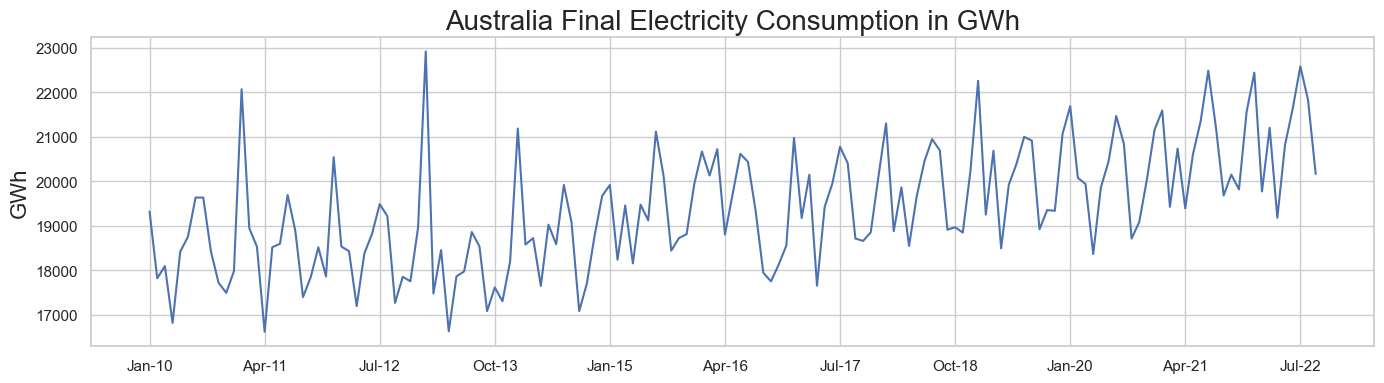

In [12]:
#plot
plt.figure(figsize=(14,4))
plt.plot(C['Time'],C['Value'])
plt.title('Australia Final Electricity Consumption in GWh', fontsize=20)
plt.ylabel('GWh', fontsize=16)
plt.tight_layout()
plt.xticks(np.arange(0, len(C['Time'])+3, 15)) ### xtick at every 15 steps to avoid label jamming

In [13]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

print('ADF Statistic: %f' % adfuller(C['Value'])[0])
print('p-value: %f' % adfuller(C['Value'])[1])
check_stationarity(C['Value'])

C['D.Value'] = C['Value'].diff()
print('ADF Statistic: %f' % adfuller(C['D.Value'].dropna())[0])
print('p-value: %f' % adfuller(C['D.Value'].dropna())[1])
check_stationarity(C['D.Value'].dropna())


ADF Statistic: 0.453011
p-value: 0.983373
The series is NOT stationary
ADF Statistic: -6.174303
p-value: 0.000000
The series is stationary


AUS Electricity Consumption


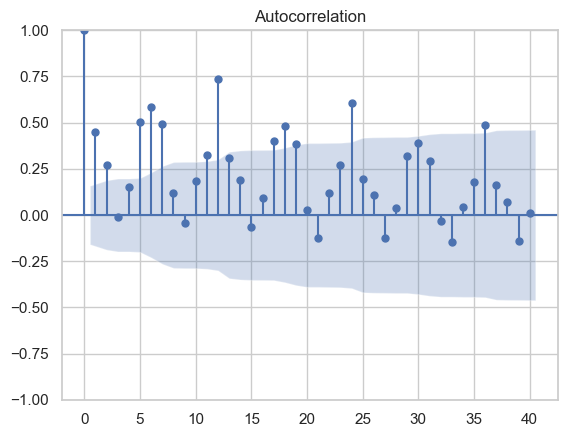

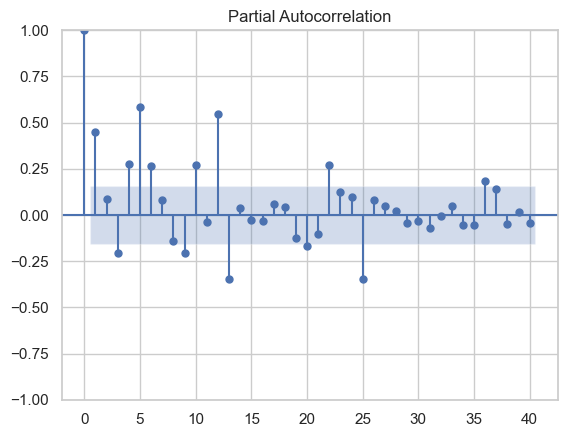

In [14]:
print('AUS Electricity Consumption')

plot_acf(C['Value'], lags=40);

### note ";" is added to suppress an additional output, viz.
###  You see two plots because the plot_acf function creates the plot and returns the figure object. In a "normal" python
###  IDE or script this would not result in two images. 

plot_pacf(C['Value'], lags=40);

AUS Electricity Consumption - First Differencing


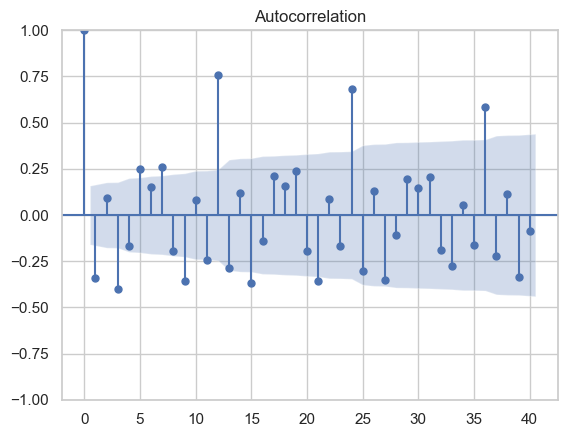

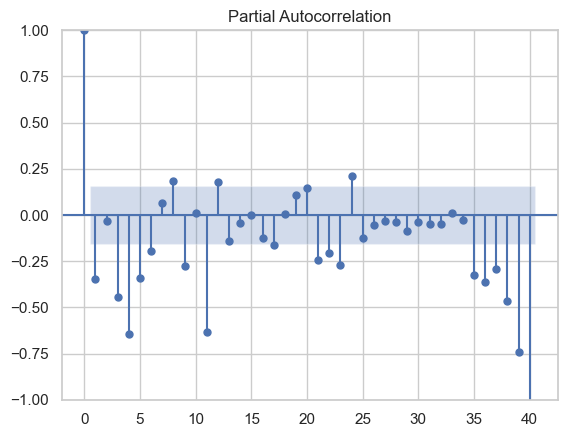

In [15]:
### Plot ACF, PACF after first differencing
print('AUS Electricity Consumption - First Differencing')

plot_acf(C['D.Value'].dropna(), lags=40);
plot_pacf(C['D.Value'].dropna(), lags=40);

In [16]:
### In [14], [15], spikes every 12 months indicate there is a seasonal (12-month) effect that cannot be removed by first
###  differencing. The decay nature of ACF and PACF particularly for C['value'] indicates presence of AR and MA.

Seasonal Differencing


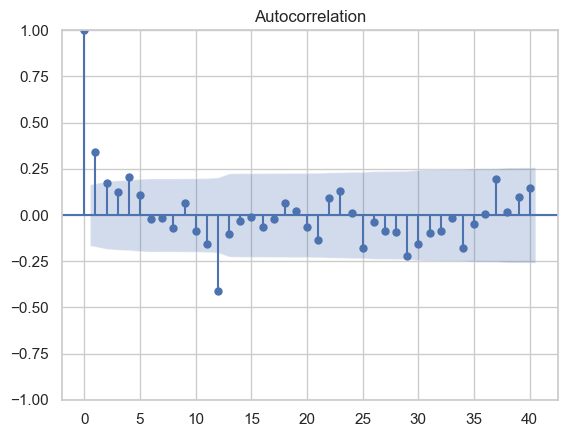

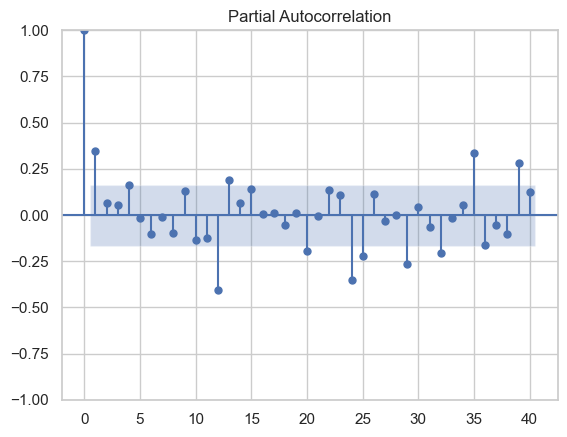

In [17]:
### Note the significant ACF at lag 12, 24, etc. do not seem to disappear. Suspect seasonal (once a year) effect
print('Seasonal Differencing')

C['Seasonal_Value']=C['Value']-C['Value'].shift(12)

### Plot ACF, PACF after 12-month differencing
plot_acf(C['Seasonal_Value'].dropna(), lags=40);
plot_pacf(C['Seasonal_Value'].dropna(), lags=40);

In [18]:
print('ADF Statistic: %f' % adfuller(C['Seasonal_Value'].dropna())[0])
print('p-value: %f' % adfuller(C['Seasonal_Value'].dropna())[1])
check_stationarity(C['Seasonal_Value'].dropna())

ADF Statistic: -2.566971
p-value: 0.100018
The series is NOT stationary


In [19]:
### Above is marginal and may be treated as stationary after deseasonalized at 10% significance level test. 
###   Otherwise (1,1,1) x (0,1,0,12) becomes a bit non parsimonious

In [20]:
import statsmodels.api as sm
model0 = sm.tsa.statespace.SARIMAX(C['Value'], trend='c', order=(1,0,1), seasonal_order=(0, 1, 0, 12))  
model0_fit=model0.fit(disp=0)
print(model0_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Value   No. Observations:                  153
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood               -1116.956
Date:                             Fri, 26 Jan 2024   AIC                           2241.913
Time:                                     10:13:19   BIC                           2253.708
Sample:                                          0   HQIC                          2246.706
                                             - 153                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    113.9907     62.407      1.827      0.068      -8.325     236.306
ar.L1          0.4215      

In [21]:
import statsmodels.api as sm
model1 = sm.tsa.statespace.SARIMAX(C['Seasonal_Value'].dropna(), trend='c', order=(1,0,1))  ### need to add .dropna to remove null rows
model1_fit=model1.fit(disp=0)
print(model1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Seasonal_Value   No. Observations:                  141
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1122.882
Date:                Fri, 26 Jan 2024   AIC                           2253.764
Time:                        10:13:19   BIC                           2265.559
Sample:                             0   HQIC                          2258.557
                                - 141                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    113.9905     56.836      2.006      0.045       2.594     225.387
ar.L1          0.5685      0.180      3.152      0.002       0.215       0.922
ma.L1         -0.2361      0.215     -1.099      0.2

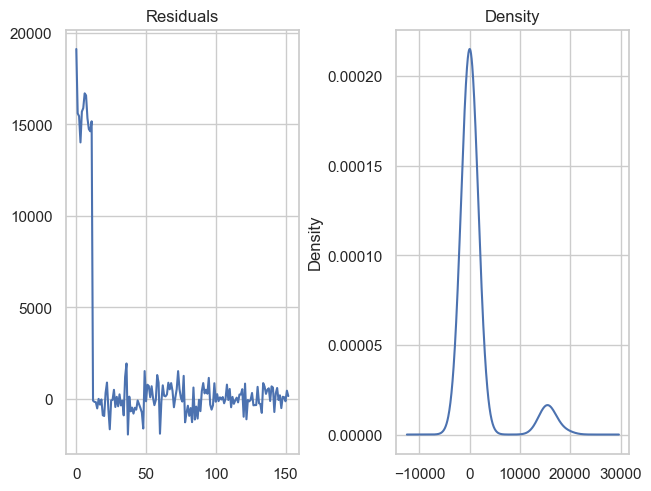

In [22]:
### Plot residual errors
### See https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
residuals0 = model0_fit.resid
fig,ax = plt.subplots(1,2,constrained_layout = True)
residuals0.plot(title="Residuals", ax=ax[0])
residuals0.plot(kind='kde',title='Density',ax=ax[1])
plt.show()

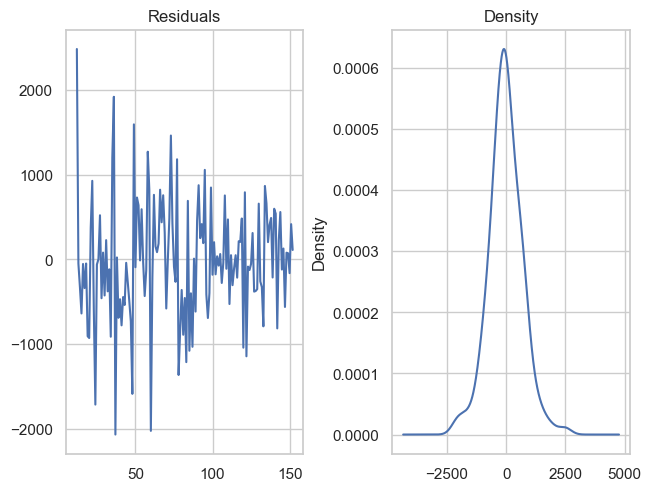

In [23]:
### Plot residual errors
### See https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
residuals1 = model1_fit.resid
fig,ax = plt.subplots(1,2,constrained_layout = True)
residuals1.plot(title="Residuals", ax=ax[0])
residuals1.plot(kind='kde',title='Density',ax=ax[1])
plt.show()

In [24]:
residuals1.shape

(141,)

In [25]:
predictions = model1.fit().predict()  ### Note: 'predict' is fitting here
print(predictions)
predictions.shape

12      264.191167
13     1172.409132
14      764.416913
15      438.793546
16      151.384626
          ...     
148     126.240579
149     212.139174
150     258.836850
151     207.283447
152     370.331253
Name: predicted_mean, Length: 141, dtype: float64


(141,)

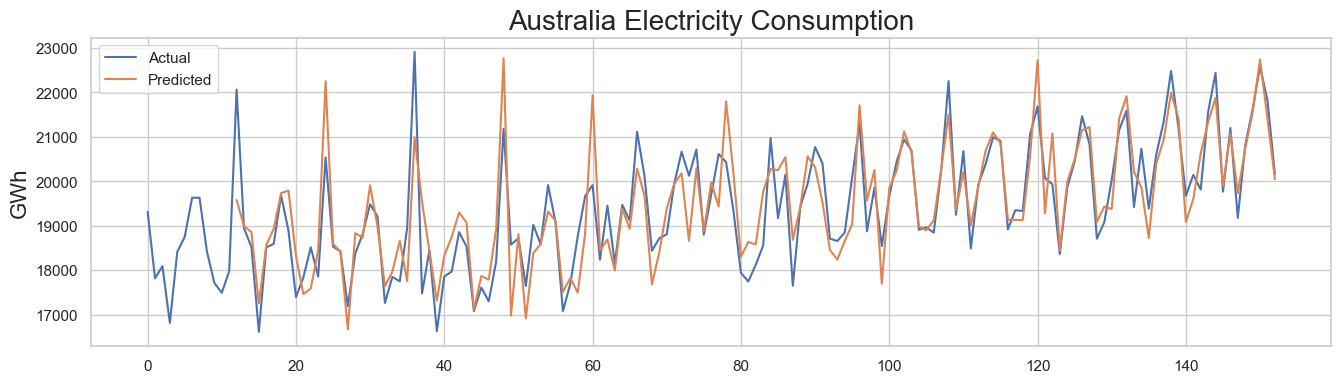

In [26]:
predict12=(predictions) + C['Value'].shift(12)
plt.figure(figsize=(16,4))
plt.plot(C['Value'], label="Actual")
plt.plot(predict12, label="Predicted")
plt.title('Australia Electricity Consumption', fontsize=20)
plt.ylabel('GWh', fontsize=16)
plt.legend()

In [27]:
err=predict12-C['Value']
percenterr=(err/C['Value'])
percenterr=percenterr.dropna()

In [28]:
print(max(abs(percenterr)),min(abs(percenterr)))
print(max(percenterr),min(percenterr))

0.11828284188487458 0.00017648288476618826
0.11828284188487458 -0.11258417904997475
